In [1389]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1390]:
data = pd.read_csv("churn_prediction.csv")
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


## Take a Quick Look at the Data

In [1391]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   days_since_last_transaction     25159 non-null  float64
 10  current_balance                 28382 non-null  float64
 11  previous_month_end_balance      28382 non-null  float64
 12  average_monthly_balance_prevQ   

We have only two categorical features, that is, gender and occupation. Also, there are quite a few missing values. These features are gender, dependents, occupation, city, and days_since_last_transaction.

In [1392]:
data.corr()["churn"].sort_values(ascending=False)

churn                             1.000000
previous_month_debit              0.073058
current_month_debit               0.048041
previous_month_credit             0.042179
branch_code                       0.035469
dependents                        0.033487
current_month_credit              0.020755
average_monthly_balance_prevQ2    0.018376
previous_month_balance            0.014593
average_monthly_balance_prevQ     0.011960
previous_month_end_balance        0.006886
customer_nw_category              0.006551
city                             -0.001585
customer_id                      -0.002723
current_month_balance            -0.006391
age                              -0.020012
current_balance                  -0.024181
days_since_last_transaction      -0.055830
vintage                          -0.064637
Name: churn, dtype: float64

These numerical features doesn't have strong correlation with churn

## Imputing Missing Values

In [1393]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

### Gender & Occupation Features

<AxesSubplot:xlabel='occupation', ylabel='count'>

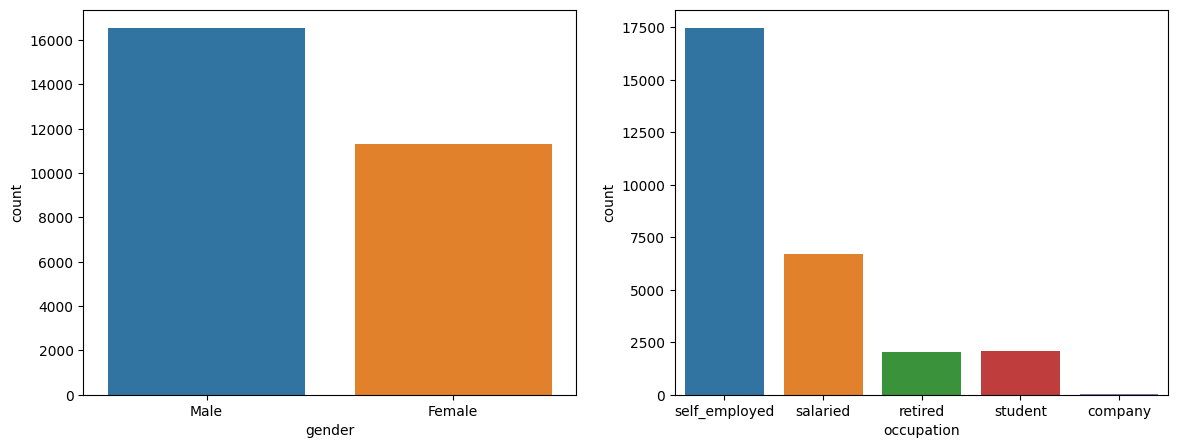

In [1394]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x=data['gender'], ax=ax[0])
sns.countplot(x=data['occupation'], ax=ax[1])

We can replace Female and Male with 1 or 0. For missing values we can use -1. For occupation we can fill missing values as Unknown.

<AxesSubplot:xlabel='occupation', ylabel='count'>

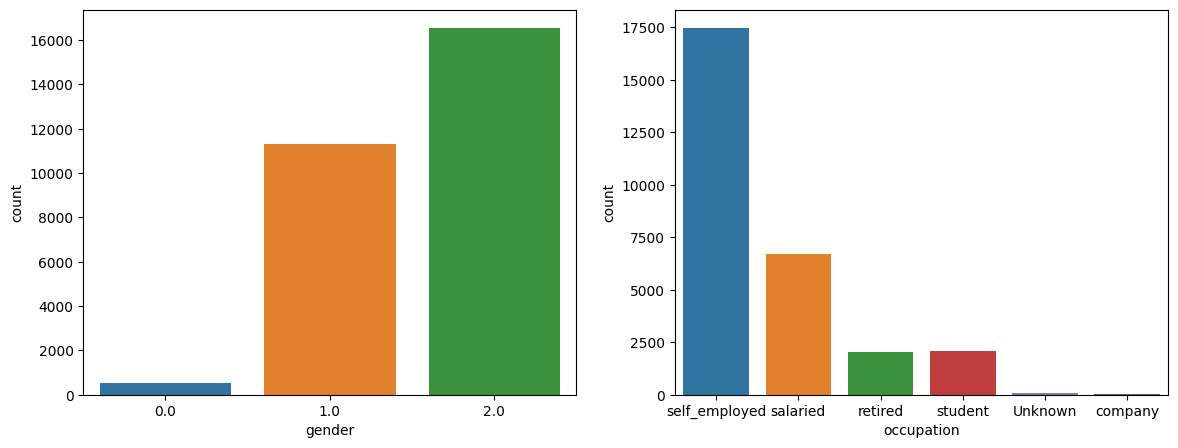

In [1395]:
gender_dictionary = {"Male": 2, "Female": 1, np.NaN: 0}
data.replace({'gender': gender_dictionary}, inplace = True)

data["occupation"].fillna("Unknown", inplace=True)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x=data['gender'], ax=ax[0])
sns.countplot(x=data['occupation'], ax=ax[1])

<AxesSubplot:xlabel='churn', ylabel='count'>

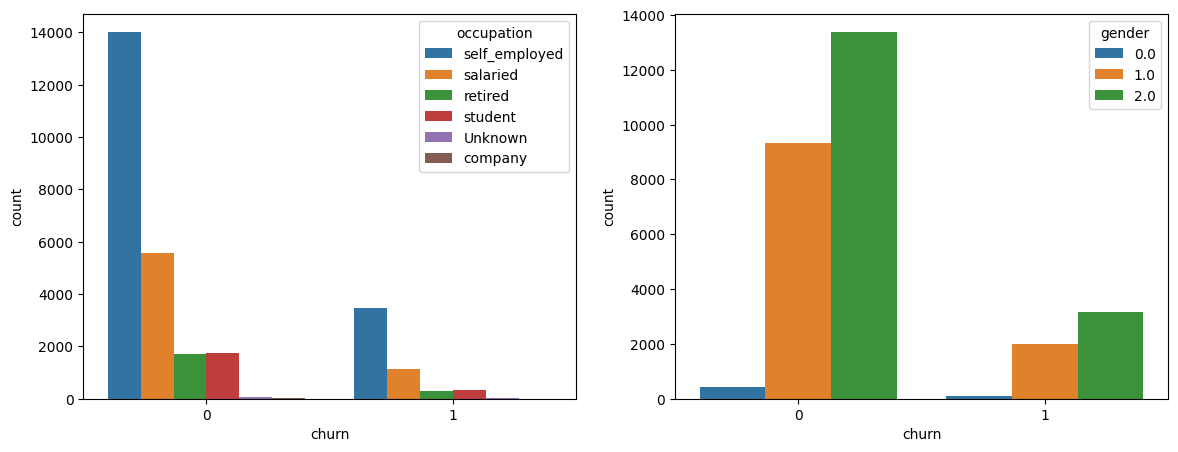

In [1396]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=data, x="churn", hue="occupation", ax=ax[0])
sns.countplot(data=data, x="churn", hue="gender", ax=ax[1])

In [1397]:
data['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
9.0         1
52.0        1
36.0        1
50.0        1
8.0         1
25.0        1
32.0        1
Name: dependents, dtype: int64

We can change dependents as yes(1) or no(0)

In [1398]:
data['dependents'] = data['dependents'].apply(lambda x: int(x > 0))
data['dependents'].value_counts()

0    23898
1     4484
Name: dependents, dtype: int64

Also we can group the age and vintage features

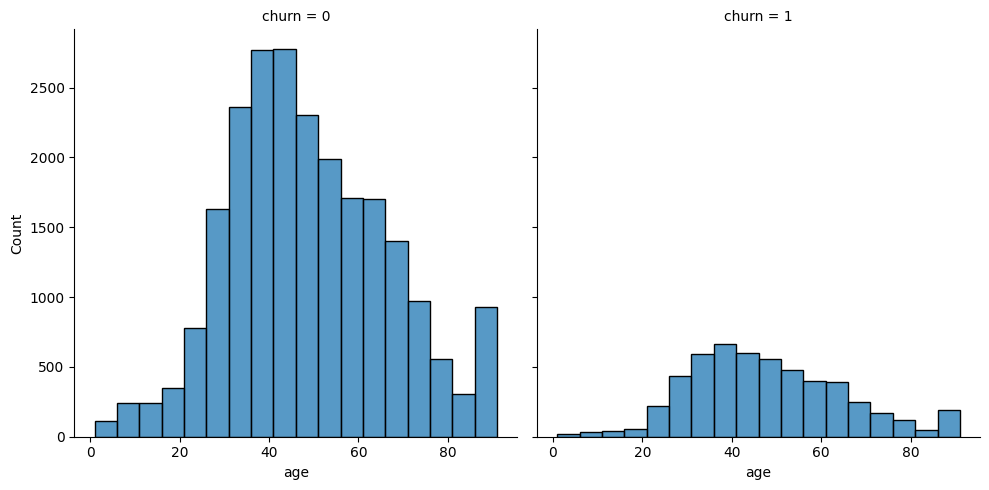

In [1399]:
sns.displot(data, x="age", col="churn", binwidth=5)

In [1400]:
data['age_group'] = data['age'].apply(lambda x: x // 20)
data[['age_group', 'age']].head()

,age_group,age
0,3,66
1,1,35
2,1,31
3,4,90
4,2,42


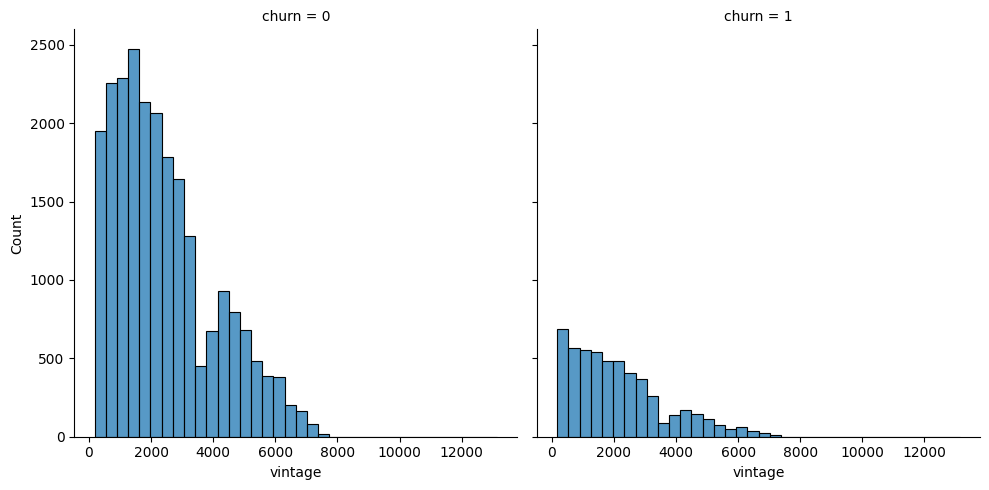

In [1401]:
sns.displot(data, x="vintage", col="churn", binwidth=360)

In [1402]:
data['vintage_group'] = data['vintage'].apply(lambda x: x // 360)
data[['vintage_group', 'vintage']].head()

,vintage_group,vintage
0,8,3135
1,0,310
2,6,2356
3,1,478
4,7,2531


In [1403]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
imputed_data = imputer.fit_transform(data)
data = pd.DataFrame(data=imputed_data, columns=data.columns).astype(data.dtypes.to_dict())
data.head()


,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,age_group,vintage_group
0,1,3135,66,2.0,0,self_employed,187.0,2,755,224.0,...,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,3,8
1,2,310,35,2.0,0,self_employed,1020.0,2,3214,60.0,...,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,1,0
2,4,2356,31,2.0,0,salaried,146.0,2,41,0.0,...,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,1,6
3,5,478,90,0.0,0,self_employed,1020.0,2,582,147.0,...,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,4,1
4,6,2531,42,2.0,1,self_employed,1494.0,3,388,58.0,...,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2,7


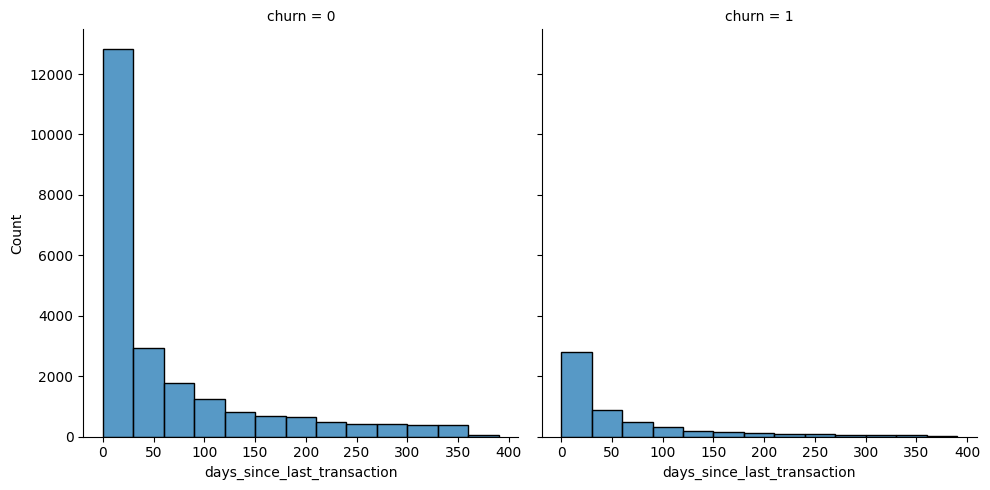

In [1404]:
sns.displot(data, x="days_since_last_transaction", col="churn", binwidth=30)

We can also convert days_since_last_transaction feature to the week and month

In [1405]:
data['weeks_since_last_transaction'] = data['days_since_last_transaction'].apply(lambda x: x // 7)
data['months_since_last_transaction'] = data['days_since_last_transaction'].apply(lambda x: x // 30)

## Encoding Categorical Features

In [1406]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")
occupation_encoded = pd.DataFrame(data=encoder.fit_transform(data[["occupation"]]), 
                                  columns=encoder.get_feature_names_out())
occupation_encoded

,occupation_Unknown,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
28377,0.0,0.0,0.0,0.0,0.0,1.0
28378,0.0,0.0,0.0,0.0,1.0,0.0
28379,0.0,0.0,0.0,1.0,0.0,0.0
28380,0.0,0.0,0.0,0.0,1.0,0.0


In [1407]:
data.drop("occupation", axis=1, inplace=True)
data = pd.concat([data, occupation_encoded], axis=1)
data.head(7)

,customer_id,vintage,age,gender,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,...,age_group,vintage_group,weeks_since_last_transaction,months_since_last_transaction,occupation_Unknown,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,2.0,0,187.0,2,755,224.0,1458.71,...,3,8,32.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,310,35,2.0,0,1020.0,2,3214,60.0,5390.37,...,1,0,8.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4,2356,31,2.0,0,146.0,2,41,0.0,3913.16,...,1,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5,478,90,0.0,0,1020.0,2,582,147.0,2291.91,...,4,1,21.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0
4,6,2531,42,2.0,1,1494.0,3,388,58.0,927.72,...,2,7,8.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,7,263,42,1.0,0,1096.0,2,1666,60.0,15202.20,...,2,0,8.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
6,8,5922,72,2.0,0,1020.0,1,1,98.0,7006.93,...,3,16,14.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0


In [1408]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          28382 non-null  float64
 4   dependents                      28382 non-null  int64  
 5   city                            28382 non-null  float64
 6   customer_nw_category            28382 non-null  int64  
 7   branch_code                     28382 non-null  int64  
 8   days_since_last_transaction     28382 non-null  float64
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [1409]:
data.nunique()

customer_id                       28382
vintage                            5473
age                                  90
gender                                3
dependents                            2
city                               1604
customer_nw_category                  3
branch_code                        3185
days_since_last_transaction         360
current_balance                   27903
previous_month_end_balance        27922
average_monthly_balance_prevQ     27801
average_monthly_balance_prevQ2    27940
current_month_credit              10411
previous_month_credit             10711
current_month_debit               13704
previous_month_debit              14010
current_month_balance             27944
previous_month_balance            27913
churn                                 2
age_group                             5
vintage_group                        29
weeks_since_last_transaction         53
months_since_last_transaction        13
occupation_Unknown                    2


We can drop the unimportant features such as customer_id, vintage, city, branch code etc.

In [1410]:
data.drop(["customer_id", "city", "branch_code", "vintage", "age", "days_since_last_transaction"], 
          axis=1, inplace=True)

In [1411]:
data.describe()

,gender,dependents,customer_nw_category,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,...,age_group,vintage_group,weeks_since_last_transaction,months_since_last_transaction,occupation_Unknown,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
count,28382.000000,28382.000000,28382.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,...,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000
mean,1.564548,0.157987,2.225530,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,...,1.940032,6.066521,8.473399,1.689839,0.002819,0.001409,0.071313,0.236206,0.615742,0.072511
std,0.531826,0.364736,0.660443,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,...,0.934973,4.489288,11.983698,2.740318,0.053017,0.037515,0.257351,0.424758,0.486428,0.259336
min,0.000000,0.000000,1.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,...,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,2.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,...,2.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,0.000000,3.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,...,3.000000,8.000000,11.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2.000000,1.000000,3.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,...,4.000000,35.000000,52.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation without scaling

In [1412]:
data.corr()["churn"].sort_values(ascending=False)

churn                             1.000000
previous_month_debit              0.073058
current_month_debit               0.048041
occupation_self_employed          0.042539
previous_month_credit             0.042179
dependents                        0.041515
current_month_credit              0.020755
average_monthly_balance_prevQ2    0.018376
gender                            0.015938
previous_month_balance            0.014593
average_monthly_balance_prevQ     0.011960
previous_month_end_balance        0.006886
customer_nw_category              0.006551
occupation_Unknown               -0.003124
current_month_balance            -0.006391
occupation_company               -0.008250
age_group                        -0.018870
occupation_student               -0.020072
occupation_salaried              -0.020376
current_balance                  -0.024181
occupation_retired               -0.024702
weeks_since_last_transaction     -0.030563
months_since_last_transaction    -0.034300
vintage_gro

## Seperating Target

In [1413]:
y = data["churn"].astype("int")
X = data.drop("churn", axis=1)

In [1414]:
X.head(7)

,gender,dependents,customer_nw_category,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,...,age_group,vintage_group,weeks_since_last_transaction,months_since_last_transaction,occupation_Unknown,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,2.0,0,2,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,...,3,8,32.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,0,2,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,...,1,0,8.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,0,2,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,...,1,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0,2,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,...,4,1,21.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,1,3,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,...,2,7,8.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0,2,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,...,2,0,8.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
6,2.0,0,1,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,...,3,16,14.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0


## Scaling Numerical Features

In [1415]:
from sklearn.preprocessing import StandardScaler

num_cols = ['customer_nw_category', 'current_balance', 'previous_month_end_balance', 
            'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit', 
            'previous_month_debit','current_month_balance', 'previous_month_balance']

# balancing numerical columns
# Since min value for numerical columns was -1.650610e+04, we must add 16507 to make log tranformation
for i in num_cols:
    X[i] = np.log(X[i] + 16507)

std = StandardScaler()
scaled = std.fit_transform(X[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)

X = X.drop(columns=num_cols, axis=1)
X = X.merge(scaled, left_index=True, right_index=True, how="left")

### Correlation with scaling

In [1416]:
pd.concat([X, y], axis=1).corr()["churn"].sort_values(ascending=False)

churn                             1.000000
current_month_debit               0.195566
previous_month_debit              0.182414
previous_month_credit             0.107190
current_month_credit              0.059912
occupation_self_employed          0.042539
dependents                        0.041515
previous_month_balance            0.041482
average_monthly_balance_prevQ     0.034728
gender                            0.015938
average_monthly_balance_prevQ2    0.014504
customer_nw_category              0.006550
occupation_Unknown               -0.003124
previous_month_end_balance       -0.006094
occupation_company               -0.008250
age_group                        -0.018870
occupation_student               -0.020072
occupation_salaried              -0.020376
occupation_retired               -0.024702
weeks_since_last_transaction     -0.030563
months_since_last_transaction    -0.034300
current_month_balance            -0.059204
vintage_group                    -0.064210
current_bal